Image in the RGB color space 



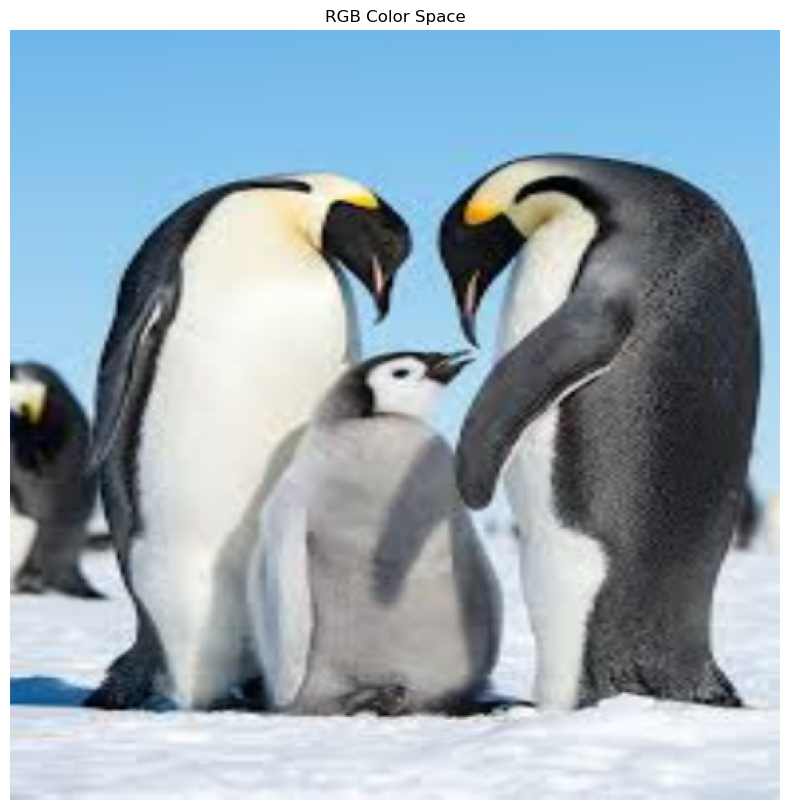



Image in the HSV color space 



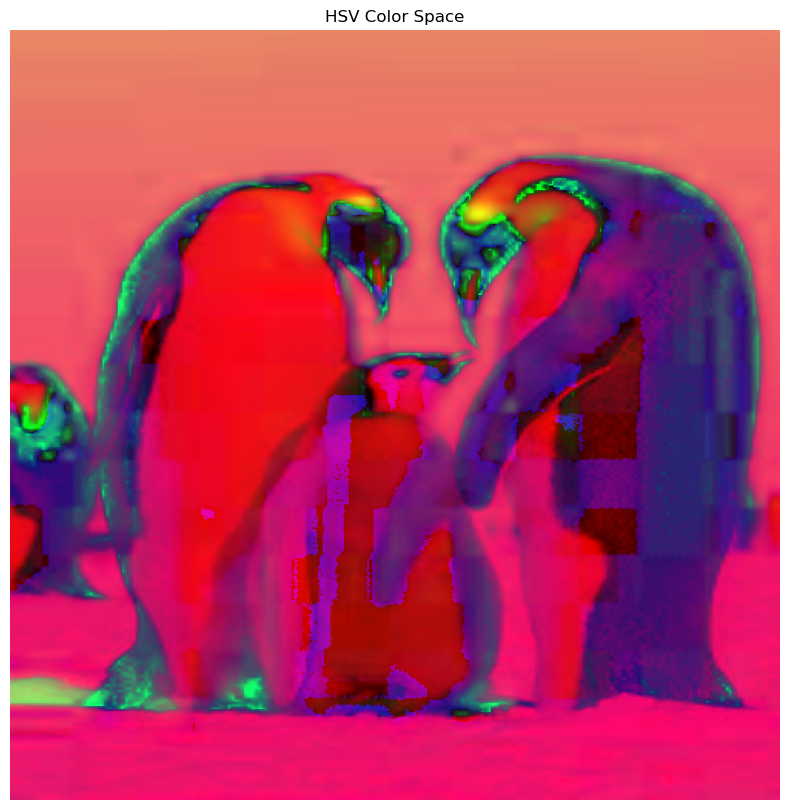



Image in the CMYK color space 



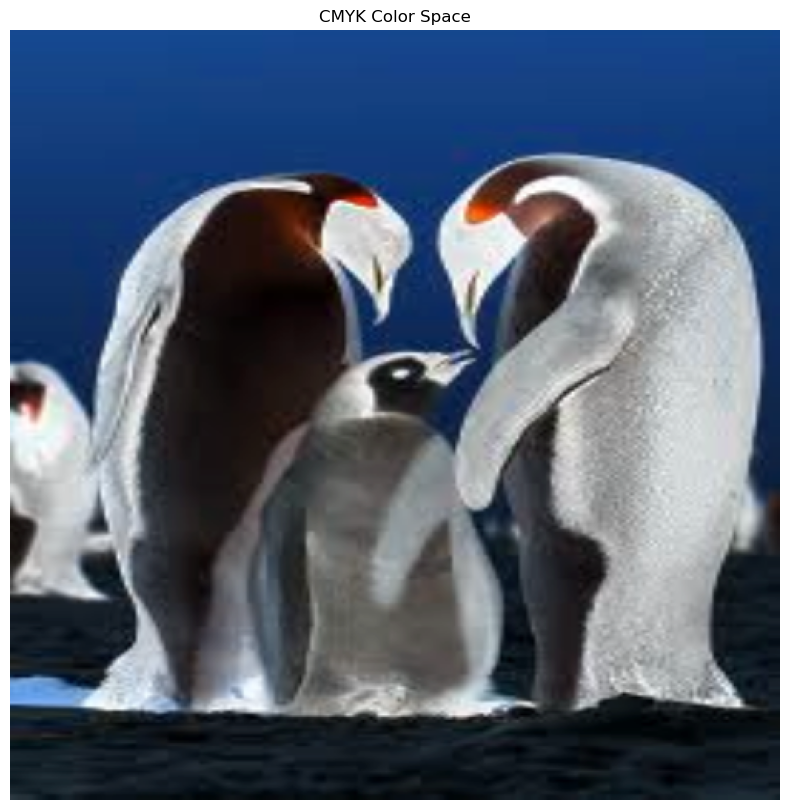



Image in the grayscale color space 



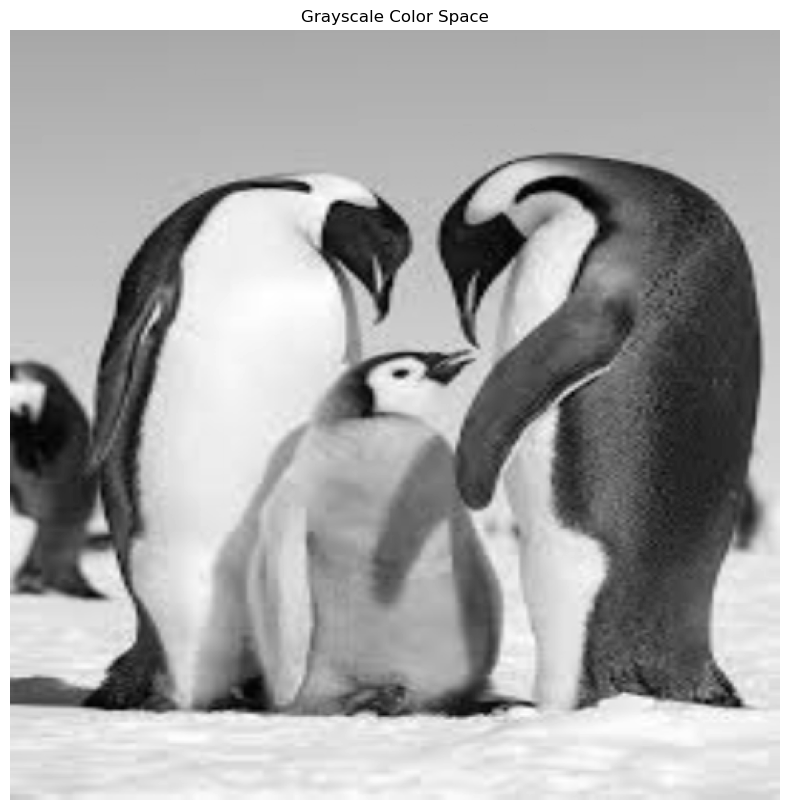

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_image(image, title='Image', cmap=None):
    plt.figure(figsize=(10, 10))
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load and resize your image
image_path = r'pen.jpg'  # Use raw string or forward slashes and ensure the correct file extension
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Resizing the image for demonstration (optional)
    image_resized = cv2.resize(image, (500, 500))  # Resize to 500x500 pixels
    image_rgb = image_resized

    # Convert to HSV
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2HSV)
    print("Image in the RGB color space \n")
    display_image(image_rgb, title='RGB Color Space')

    print("\n\nImage in the HSV color space \n")
    display_image(image_hsv, title='HSV Color Space')

    # Convert to CMYK
    image_normalized = image_rgb / 255.0
    C = 1 - image_normalized[:, :, 2]  # Cyan
    M = 1 - image_normalized[:, :, 1]  # Magenta
    Y = 1 - image_normalized[:, :, 0]  # Yellow
    K = np.min([C, M, Y], axis=0)  # Key (Black)

    # Create a CMYK image by stacking the CMYK channels
    image_cmyk = np.dstack((C, M, Y, K))
    # Scale the CMYK channels to the 0-255 range
    image_cmyk = (image_cmyk * 255).astype(np.uint8)
    print("\n\nImage in the CMYK color space \n")
    display_image(image_cmyk, title='CMYK Color Space')

    # Convert to grayscale
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)
    print("\n\nImage in the grayscale color space \n")
    display_image(image_gray, title='Grayscale Color Space', cmap='gray')
